In [276]:
import numpy as np
import matplotlib.pyplot as plt
from mlscorecheck.auc import integrate_roc_curve

In [277]:
def triangle_center(point0, point1, point2):
    return (point0 + point1 + point2)/3.0

def curve(point0, point1, point2, max_depth=3, depth=0, points=[], upper=False):
    if depth == max_depth:
        return
    center = triangle_center(point0, point1, point2)
    points.append(center)

    pointa = np.array([0, center[1]])
    pointb = np.array([center[0], 1])

    if depth == 0 or not upper:
        curve(point0, pointa, center, depth=depth+1, points=points, max_depth=max_depth, upper=False)
    if depth == 0 or upper:
        curve(center, pointb, point2, depth=depth+1, points=points, max_depth=max_depth, upper=True)

    return points

In [278]:
points = curve(np.array([0, 0]), 
               np.array([0, 1]), 
               np.array([1, 1]), 
               max_depth=2)

In [279]:
points = np.vstack(points + [np.array([0, 0]), np.array([1, 1])])

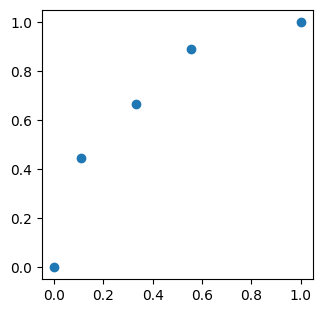

In [280]:
plt.figure(figsize=(3.5, 3.5))
plt.scatter(points[:, 0], points[:, 1])

In [281]:
points_sorted = points[np.argsort(points[:, 0])]

In [282]:
integrate_roc_curve(points_sorted[:, 0], points_sorted[:, 1]) - 2/3

0.07407407407407407

In [283]:
y_pred = []
res = 50
for idx, value in enumerate(np.linspace(1/res, 1.0, res)):
    y_pred.append(np.repeat(value, idx+1))
y_pred = np.hstack(y_pred).round(3)
#y_pred = np.hstack([y_pred, 1 - y_pred]).round(3)
count = len(y_pred)
y_pred = np.hstack([y_pred, np.linspace(1/res, 1.0, res)]).round(3)
y_true = np.hstack([np.repeat(1, count),np.repeat(0, res)])

In [284]:
y_pred

array([0.02, 0.04, 0.04, ..., 0.96, 0.98, 1.  ])

In [285]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_true, y_pred)

np.float64(0.6633333333333333)

In [286]:
np.pi/4

0.7853981633974483

In [287]:
len(y_true)/2

662.5

In [288]:
fprs, tprs, ths = roc_curve(y_true, y_pred)

In [289]:
ths

array([ inf, 1.  , 0.98, 0.96, 0.94, 0.92, 0.9 , 0.88, 0.86, 0.84, 0.82,
       0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 , 0.68, 0.66, 0.64, 0.62, 0.6 ,
       0.58, 0.56, 0.54, 0.52, 0.5 , 0.48, 0.46, 0.44, 0.42, 0.4 , 0.38,
       0.36, 0.34, 0.32, 0.3 , 0.28, 0.26, 0.24, 0.22, 0.2 , 0.18, 0.16,
       0.14, 0.12, 0.1 , 0.08, 0.06, 0.04, 0.02])

In [290]:
tprs, fprs

(array([0.        , 0.03921569, 0.07764706, 0.11529412, 0.15215686,
        0.18823529, 0.22352941, 0.25803922, 0.29176471, 0.32470588,
        0.35686275, 0.38823529, 0.41882353, 0.44862745, 0.47764706,
        0.50588235, 0.53333333, 0.56      , 0.58588235, 0.61098039,
        0.63529412, 0.65882353, 0.68156863, 0.70352941, 0.72470588,
        0.74509804, 0.76470588, 0.78352941, 0.80156863, 0.81882353,
        0.83529412, 0.85098039, 0.86588235, 0.88      , 0.89333333,
        0.90588235, 0.91764706, 0.92862745, 0.93882353, 0.94823529,
        0.95686275, 0.96470588, 0.97176471, 0.97803922, 0.98352941,
        0.98823529, 0.99215686, 0.99529412, 0.99764706, 0.99921569,
        1.        ]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
  

In [291]:
np.cumsum(np.arange(res)) / ((res + 1)*res/2)

array([0.00000000e+00, 7.84313725e-04, 2.35294118e-03, 4.70588235e-03,
       7.84313725e-03, 1.17647059e-02, 1.64705882e-02, 2.19607843e-02,
       2.82352941e-02, 3.52941176e-02, 4.31372549e-02, 5.17647059e-02,
       6.11764706e-02, 7.13725490e-02, 8.23529412e-02, 9.41176471e-02,
       1.06666667e-01, 1.20000000e-01, 1.34117647e-01, 1.49019608e-01,
       1.64705882e-01, 1.81176471e-01, 1.98431373e-01, 2.16470588e-01,
       2.35294118e-01, 2.54901961e-01, 2.75294118e-01, 2.96470588e-01,
       3.18431373e-01, 3.41176471e-01, 3.64705882e-01, 3.89019608e-01,
       4.14117647e-01, 4.40000000e-01, 4.66666667e-01, 4.94117647e-01,
       5.22352941e-01, 5.51372549e-01, 5.81176471e-01, 6.11764706e-01,
       6.43137255e-01, 6.75294118e-01, 7.08235294e-01, 7.41960784e-01,
       7.76470588e-01, 8.11764706e-01, 8.47843137e-01, 8.84705882e-01,
       9.22352941e-01, 9.60784314e-01])

In [292]:
((((res + 1)*res/2) - np.cumsum(np.arange(res))) / (((res + 1)*res/2)))[::-1]

array([0.03921569, 0.07764706, 0.11529412, 0.15215686, 0.18823529,
       0.22352941, 0.25803922, 0.29176471, 0.32470588, 0.35686275,
       0.38823529, 0.41882353, 0.44862745, 0.47764706, 0.50588235,
       0.53333333, 0.56      , 0.58588235, 0.61098039, 0.63529412,
       0.65882353, 0.68156863, 0.70352941, 0.72470588, 0.74509804,
       0.76470588, 0.78352941, 0.80156863, 0.81882353, 0.83529412,
       0.85098039, 0.86588235, 0.88      , 0.89333333, 0.90588235,
       0.91764706, 0.92862745, 0.93882353, 0.94823529, 0.95686275,
       0.96470588, 0.97176471, 0.97803922, 0.98352941, 0.98823529,
       0.99215686, 0.99529412, 0.99764706, 0.99921569, 1.        ])

In [293]:
tprs**2 + (1 - fprs)**2

array([1.        , 0.96193787, 0.92762907, 0.89689273, 0.86955171,
       0.84543253, 0.8243654 , 0.80618424, 0.79072664, 0.77783391,
       0.76735102, 0.75912664, 0.75301315, 0.74886659, 0.74654671,
       0.74591696, 0.74684444, 0.7492    , 0.75285813, 0.75769704,
       0.76359862, 0.77044844, 0.77813579, 0.78655363, 0.79559862,
       0.80517109, 0.81517509, 0.82551834, 0.83611226, 0.84687197,
       0.85771626, 0.86856763, 0.87935225, 0.89      , 0.90044444,
       0.91062284, 0.92047612, 0.92994894, 0.93898962, 0.94755017,
       0.95558631, 0.96305744, 0.96992664, 0.97616071, 0.9817301 ,
       0.986609  , 0.99077524, 0.99421038, 0.99689965, 0.99883199,
       1.        ])

In [294]:
54/55

0.9818181818181818

In [295]:
36/55

0.6545454545454545

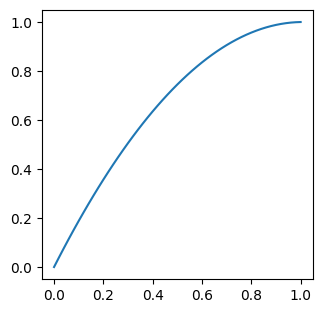

In [296]:
plt.figure(figsize=(3.5, 3.5))
plt.plot(fprs, tprs)

In [297]:
ths = np.linspace(0, 1, 100)
tprs = (ths + 1)/2
fprs = (1 - ths)

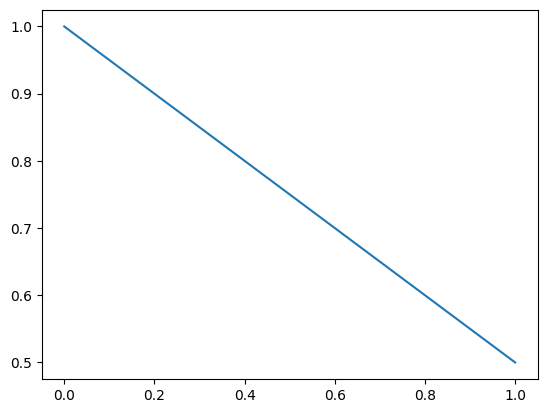

In [298]:
plt.plot(fprs, tprs)